[[-1.31321916 -3.06173651]
 [-2.94098186  3.30937858]
 [ 4.25420101 -0.24764206]]
[13.3403613  -8.62600971 -4.71435159]


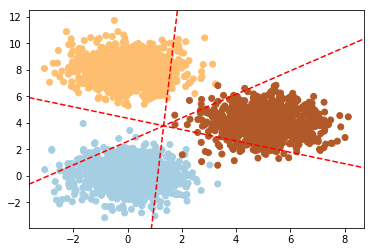

[[-4.30594796 -4.42977115]
 [-3.67450446  4.16043866]
 [ 5.36391387 -0.07969869]]
[ 17.4729869  -16.71251177 -13.75415381]


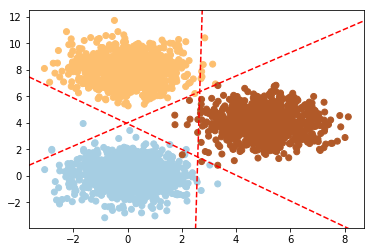

In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# %matplotlib inline
np.random.seed(1)
data_a = np.random.normal(loc=(0,0),scale=1, size=(1000, 2))
data_b = np.random.normal(loc=(0,8),scale=1, size=(1000, 2))
data_c = np.random.normal(loc=(5,4),scale=1, size=(1000, 2))
label_a = np.full((1000, 1), 0, dtype=int)
label_b = np.full((1000, 1), 1, dtype=int)
label_c = np.full((1000, 1), 2, dtype=int)

data = np.concatenate([data_a, data_b, data_c],axis=0)
label = np.concatenate([label_a, label_b, label_c],axis=0)
data_all = np.concatenate([data, label],axis=1)
data = pd.DataFrame(data_all)

data.columns=['x','y','label'] 

all_data = data[['x', 'y',]]
all_label = data['label']
train_data, test_data, train_label, test_label = train_test_split(all_data, all_label,test_size=0.5, random_state=1)

for multi_class in ('multinomial', 'ovr'):
    model = LogisticRegression(C=1e5, solver='saga',max_iter=10000, multi_class=multi_class)
    # model = LogisticRegression(C=1e5, solver='saga',max_iter=100, multi_class='ovr')
    model.fit(train_data, train_label)
    model.score(test_data,test_label)

    plt.scatter(data['x'],data['y'], c=data['label'], cmap=plt.cm.Paired)
    print(model.coef_)
    print(model.intercept_)
    
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    for a, b in zip(model.coef_, model.intercept_):
        def line(x):
            return -(a[0] * np.array(x) +b)/a[1]  
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],ls="--",color='red')
    plt.show()


[[0.12184647 1.71376662]]
[-6.3663731]


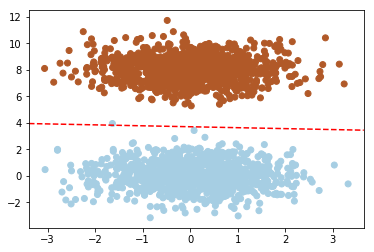

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# %matplotlib inline
np.random.seed(1)
data_a = np.random.normal(loc=(0,0),scale=1, size=(1000, 2))
data_b = np.random.normal(loc=(0,8),scale=1, size=(1000, 2))
label_a = np.full((1000, 1), 0, dtype=int)
label_b = np.full((1000, 1), 1, dtype=int)


data = np.concatenate([data_a, data_b],axis=0)
label = np.concatenate([label_a, label_b],axis=0)
data_all = np.concatenate([data, label],axis=1)
data = pd.DataFrame(data_all)

data.columns=['x','y','label'] 

all_data = data[['x', 'y',]]
all_label = data['label']
train_data, test_data, train_label, test_label = train_test_split(all_data, all_label,test_size=0.5, random_state=1)

model = LogisticRegression(C=1e5, solver='saga',max_iter=10000, multi_class='multinomial')
# model = LogisticRegression(C=1e5, solver='saga',max_iter=100, multi_class='ovr')
model.fit(train_data, train_label)
model.score(test_data,test_label)

plt.scatter(data['x'],data['y'], c=data['label'], cmap=plt.cm.Paired)
# solver='sag', max_iter=100
print(model.coef_)
print(model.intercept_)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

for a, b in zip(model.coef_, model.intercept_):
    def line(x):
        return -(a[0] * np.array(x) +b)/a[1]  
    plt.plot([xmin, xmax], [line(xmin), line(xmax)],ls="--",color='red')
